In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [17]:
warnings.filterwarnings("ignore")

# Data Preprocessing

In [18]:
df = pd.read_csv("imdb_top_1000.csv")

In [19]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IMDB_Rating,1000.0,7.94930,0.275491,7.6,7.70,7.9,8.10,9.3
Meta_score,843.0,77.97153,12.376099,28.0,70.00,79.0,87.00,100.0
No_of_Votes,1000.0,273692.91100,327372.703934,25088.0,55526.25,138548.5,374161.25,2343110.0


In [37]:
df.isnull().sum().T

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [23]:
df_cleaned = df.dropna()

In [24]:
df_cleaned.isna().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    714 non-null    object 
 1   Series_Title   714 non-null    object 
 2   Released_Year  714 non-null    object 
 3   Certificate    714 non-null    object 
 4   Runtime        714 non-null    object 
 5   Genre          714 non-null    object 
 6   IMDB_Rating    714 non-null    float64
 7   Overview       714 non-null    object 
 8   Meta_score     714 non-null    float64
 9   Director       714 non-null    object 
 10  Star1          714 non-null    object 
 11  Star2          714 non-null    object 
 12  Star3          714 non-null    object 
 13  Star4          714 non-null    object 
 14  No_of_Votes    714 non-null    int64  
 15  Gross          714 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 94.8+ KB


In [38]:
df_cleaned.describe()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes
count,713.000000,714.000000,714.000000,7.140000e+02
mean,1995.736325,7.937115,77.158263,3.561348e+05
std,18.598222,0.293278,12.401144,3.539011e+05
min,1930.000000,7.600000,28.000000,2.522900e+04
25%,1987.000000,7.700000,70.000000,9.600975e+04
50%,2001.000000,7.900000,78.000000,2.366025e+05
75%,2010.000000,8.100000,86.000000,5.077922e+05
max,2019.000000,9.300000,100.000000,2.343110e+06


In [27]:
# Convert data types
df_cleaned['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Analysis

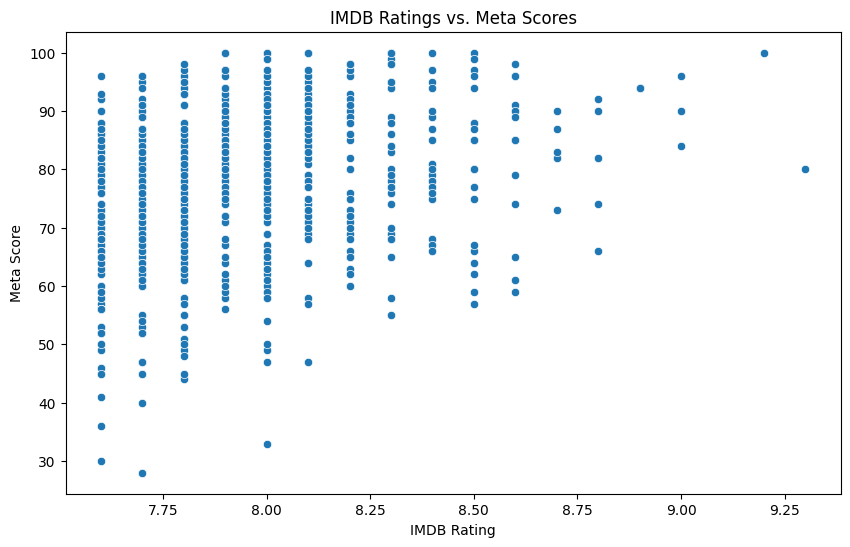

In [29]:

# Line/Scatter Graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Meta_score', data=df)
plt.title('IMDB Ratings vs. Meta Scores')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.show()

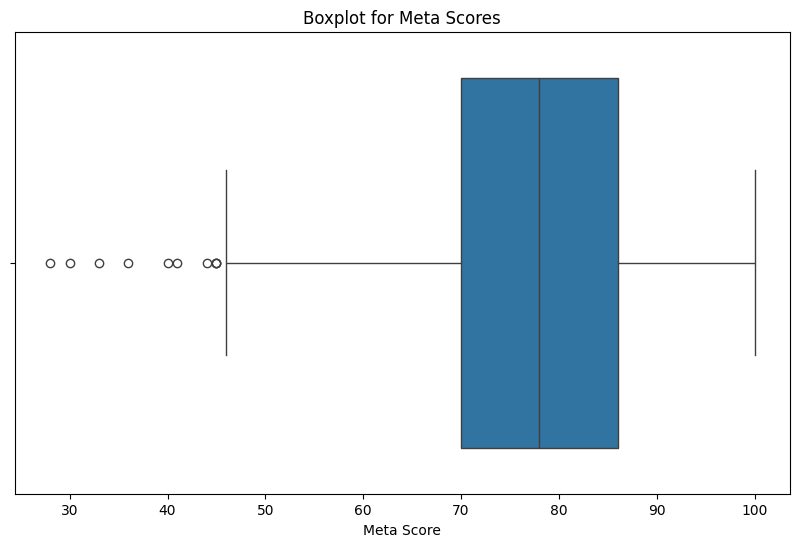

In [30]:
# Boxplot for Meta Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='Meta_score', data=df_cleaned)
plt.title('Boxplot for Meta Scores')
plt.xlabel('Meta Score')
plt.show()


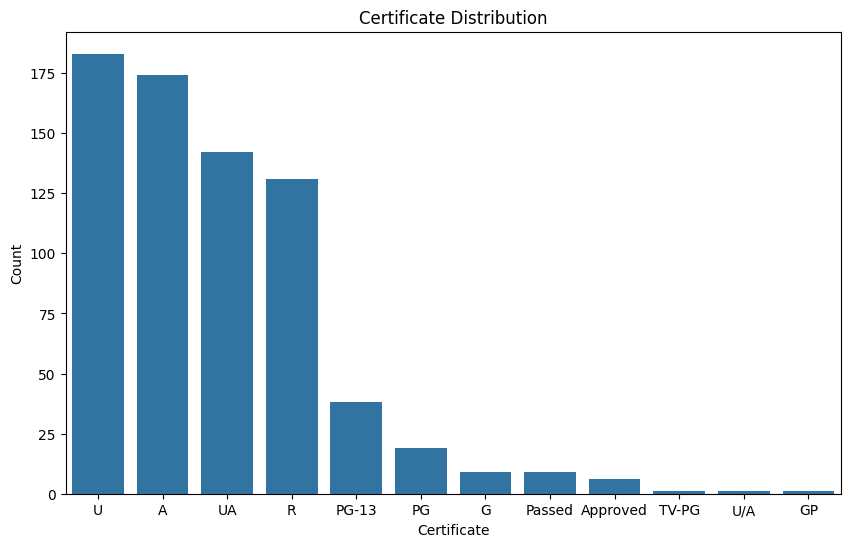

In [39]:
# Bar Chart for Certificate Distribution
certificate_order = df_cleaned['Certificate'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(x='Certificate', data=df_cleaned, order=certificate_order)
plt.title('Certificate Distribution')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.show()

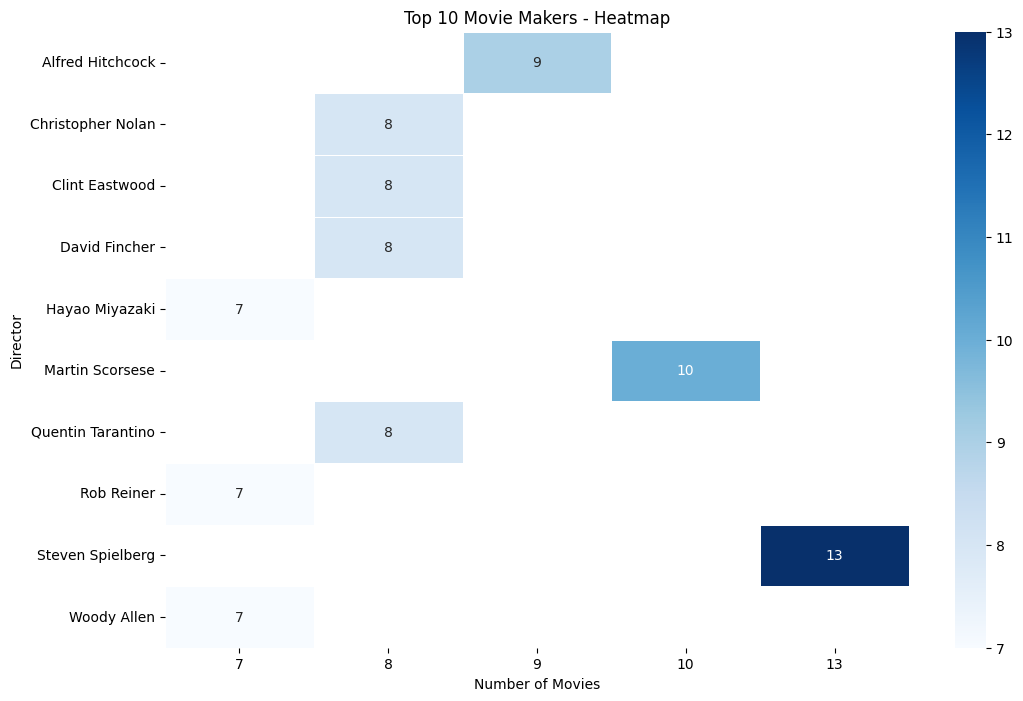

In [46]:
# Top 10 Movie Makers Horizontal Bar Chart
top_directors = df_cleaned['Director'].value_counts().nlargest(10)

# Create a DataFrame from the top_directors series
top_directors_df = pd.DataFrame({'Director': top_directors.index, 'Number of Movies': top_directors.values})

# Pivot the DataFrame for heatmap
heatmap_data = top_directors_df.pivot(index='Director', columns='Number of Movies', values='Number of Movies')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g', linewidths=.5)
plt.title('Top 10 Movie Makers - Heatmap')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


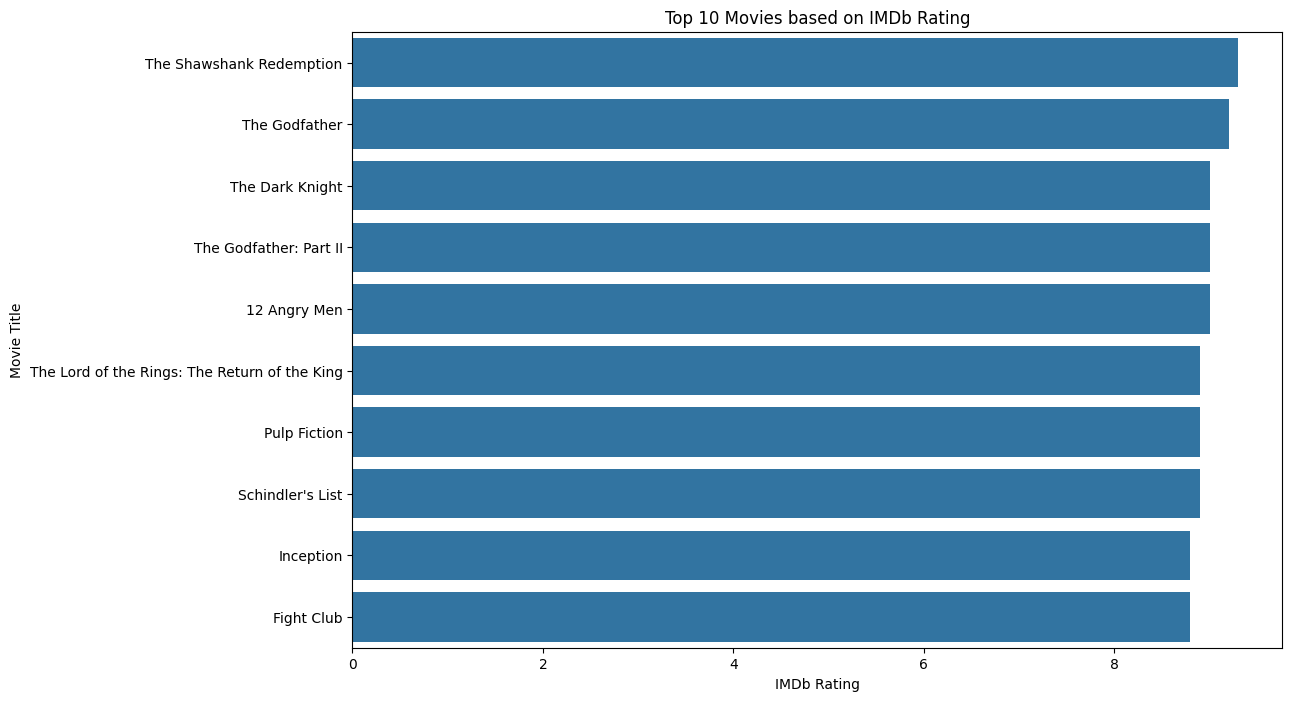

In [45]:
# Top 10 Movies based on IMDb Rating Horizontal Bar Chart
top_movies = df_cleaned.nlargest(10, 'IMDB_Rating')

plt.figure(figsize=(12, 8))
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_movies )
plt.title('Top 10 Movies based on IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.show()


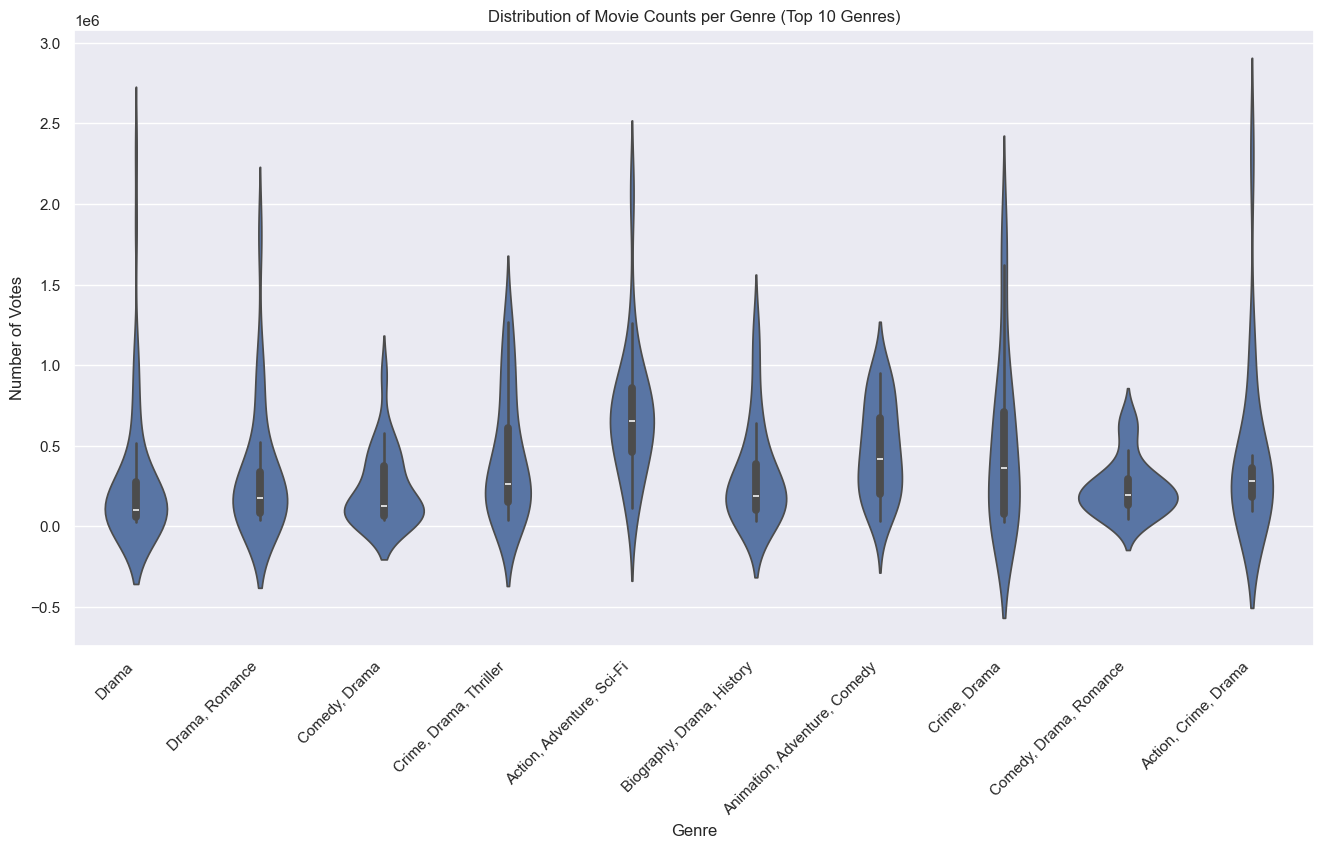

In [49]:
# Count occurrences of each genre
genre_counts = df_cleaned['Genre'].value_counts()
top_genres = genre_counts.nlargest(10).index
df_top_genres = df_cleaned[df_cleaned['Genre'].isin(top_genres)]

# Sort genres
sorted_genres = df_top_genres['Genre'].value_counts().index

# Increase font size
sns.set(rc={'font.size': 20})

plt.figure(figsize=(16, 8))
sns.violinplot(x='Genre', y='No_of_Votes', data=df_top_genres, order=sorted_genres)
plt.title('Distribution of Movie Counts per Genre (Top 10 Genres)')
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45, ha='right') 
plt.show()


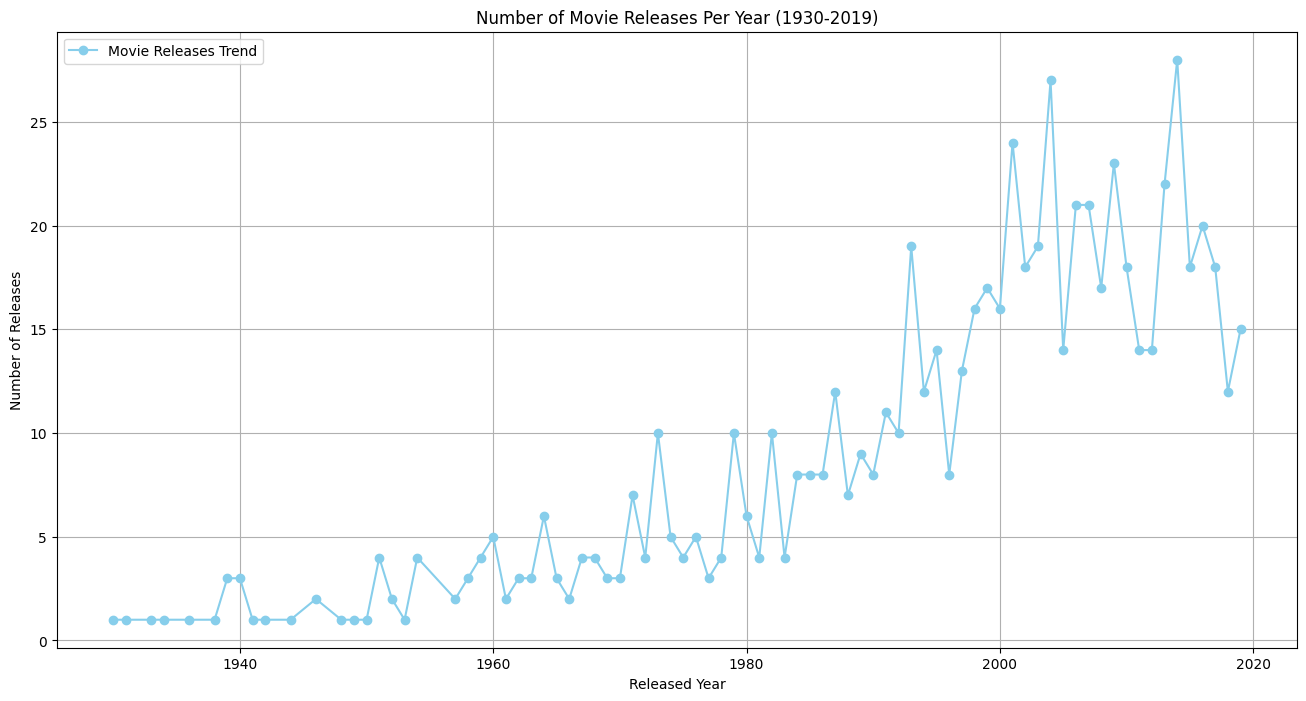

In [36]:
# Count occurrences of each year
year_counts = df_cleaned['Released_Year'].value_counts().sort_index()

# Plotting the trend with a line chart
plt.figure(figsize=(16, 8))
plt.plot(year_counts.index, year_counts, marker='o', linestyle='-', color='skyblue', label='Movie Releases Trend')
plt.title('Number of Movie Releases Per Year (1930-2019)')
plt.xlabel('Released Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()
